In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv("/content/drive/MyDrive/students-iq-cgpa-clustering/student_clustering.csv")
data

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


In [8]:
data.isnull().sum()

cgpa    0
iq      0
dtype: int64

In [9]:
data.describe()

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


In [10]:
data.drop_duplicates(inplace=True)

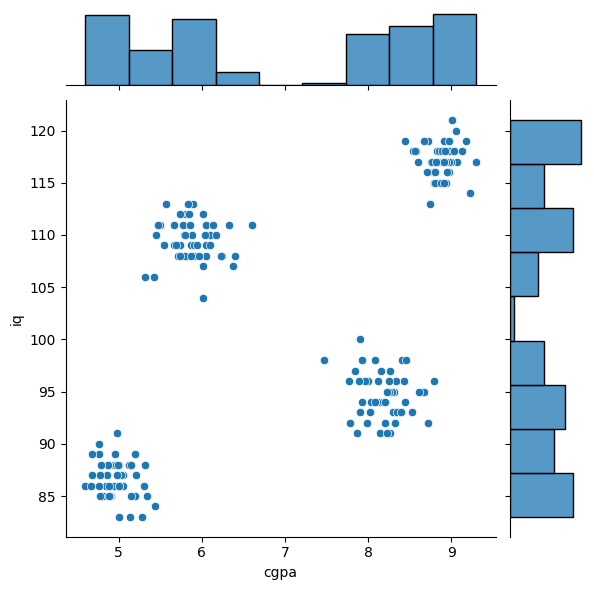

In [7]:
# prompt: Using dataframe data: 2-d distribution

sns.jointplot(x='cgpa', y='iq', data=data)


In [11]:
X = data.iloc[:, [0,1]].values

In [13]:
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, max_iter = 300)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

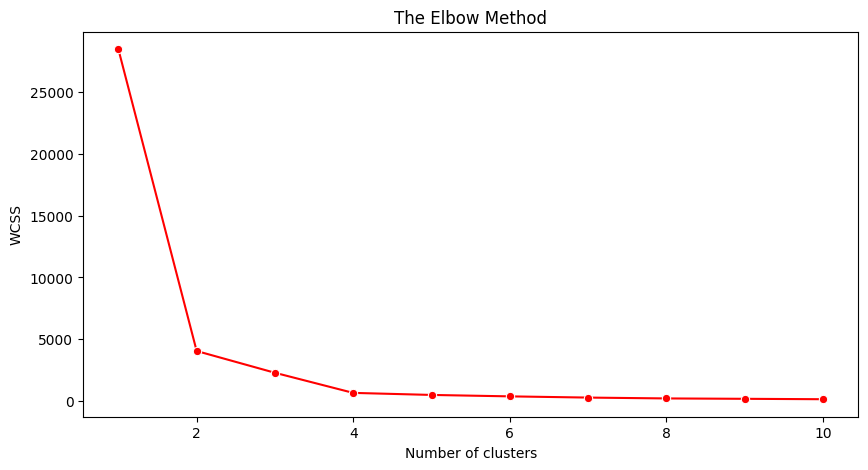

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


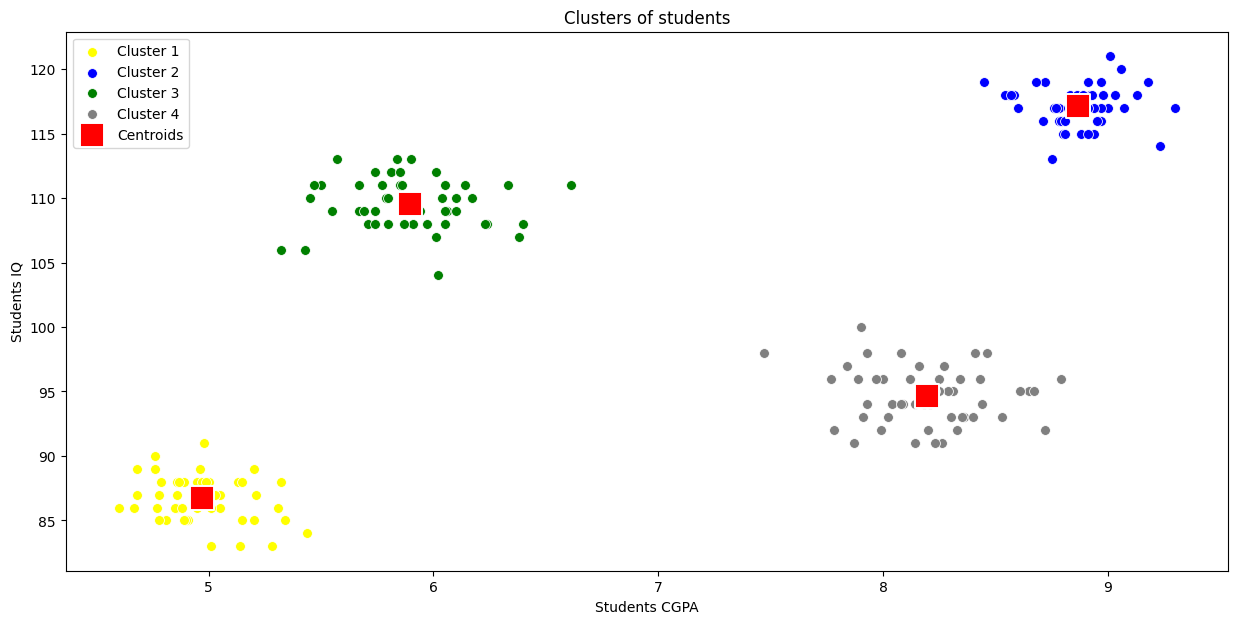

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 7))

cluster1_data = X[y_kmeans == 0, :]
sns.scatterplot(x = cluster1_data[:, 0], y = cluster1_data[:, 1], color='yellow', label='Cluster 1', s=50)

cluster2_data = X[y_kmeans == 1, :]
sns.scatterplot(x = cluster2_data[:, 0], y = cluster2_data[:, 1], color='blue', label='Cluster 2', s=50)

cluster3_data = X[y_kmeans == 2, :]
sns.scatterplot(x = cluster3_data[:, 0], y = cluster3_data[:, 1], color='green', label='Cluster 3', s=50)

cluster4_data = X[y_kmeans == 3, :]
sns.scatterplot(x = cluster4_data[:, 0], y = cluster4_data[:, 1], color='grey', label='Cluster 4', s=50)

sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1], color='red',
                label='Centroids', s=300, marker=',')

plt.grid(False)
plt.title('Clusters of students')
plt.xlabel('Students CGPA')
plt.ylabel('Students IQ')
plt.legend()
plt.show()

In [23]:
data['cluster'] = pd.DataFrame(y_kmeans)
data.head()

,cgpa,iq,cluster
0,5.13,88,0.0
1,5.90,113,2.0
2,8.36,93,3.0
3,8.27,97,3.0
4,5.45,110,2.0


In [24]:
data.to_csv("out.csv", index = False)